In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors

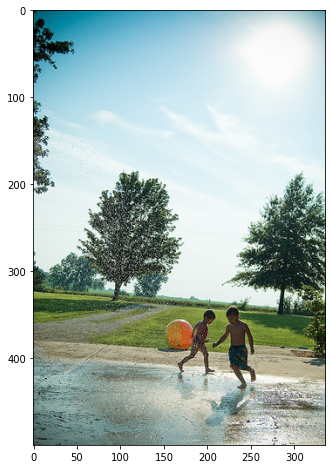

In [2]:
img = cv2.imread("../input/flickr8k/Images/1056249424_ef2a2e041c.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20 , 8))
plt.imshow(img)

In [3]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [4]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [5]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(),labels = hex_colors, colors = hex_colors , autopct='%1.2f%%')
    print(hex_colors)
    print(ordered_colors)
    print(counts)
    return(hex_colors , ordered_colors , counts)

['#89a29b', '#adcdd3', '#27372b', '#e3f0f2', '#647659']
[array([39.24110972, 55.15109834, 43.1249453 ]), array([100.69922673, 118.72687163,  89.82188139]), array([137.59701938, 162.95926989, 155.13678405]), array([173.60883856, 205.44114447, 211.4360444 ]), array([227.28198422, 240.55815048, 242.61193385])]
Counter({1: 206495, 0: 93288, 3: 85999, 4: 85508, 2: 68710})


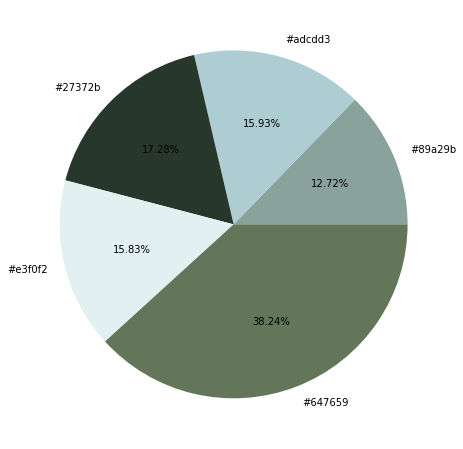

In [6]:
modified_image = prep_image(img)
hex_color , ordered_color , counts = color_analysis(modified_image)

In [7]:
hex_color

['#89a29b', '#adcdd3', '#27372b', '#e3f0f2', '#647659']

In [8]:
ordered_color

[array([39.24110972, 55.15109834, 43.1249453 ]),
 array([100.69922673, 118.72687163,  89.82188139]),
 array([137.59701938, 162.95926989, 155.13678405]),
 array([173.60883856, 205.44114447, 211.4360444 ]),
 array([227.28198422, 240.55815048, 242.61193385])]

In [9]:
dict_counts = dict(counts)

In [10]:
type(dict_counts)

dict

In [11]:
count = 0 
for i , j in dict_counts.items():
    if(count < j):
        count = j

In [12]:
keys = [k for k, v in dict_counts.items() if v == count]
for i in keys:
    main_key = i
main_key

1

In [13]:
img_main_color = ordered_color[main_key]
img_main_color

array([100.69922673, 118.72687163,  89.82188139])

In [14]:
main_img_hex = rgb_to_hex(img_main_color)
main_img_hex.upper()

'#647659'

In [15]:
red = ['#880808' ,'#AA4A44','#EE4B2B','#A52A2A',
      '#800020','#6E260E','#CC5500','#E97451','#702963',
       '#D22B2B','#C41E3A','#D70040','#DE3163','#D2042D',
       '#954535','#811331','#F88379','#814141','#DC143C',
       '#8B0000']

In [16]:
yellow = ['#EADDCA' , '#FFBF00','#FBCEB1','#F5F5DC',
         '#E1C16E','#FFEA00','#FDDA0D','#FFFF8F',
          '#DFFF00','#E4D00A','#FFF8DC','#FFFDD0',
          '#8B8000','#FAD5A5','#C2B280','#EEDC82',
          '#E49B0F','#FFD700','#FFC000','#DAA520',
          '#FCF55F','#FFFFF0','#F8DE7E','#F0E68C',
          '#FAFA33','#FBEC5D','#F4BB44','#FFDB58',
          '#FADA5E','#FFDEAD','#ECFFDC','#FFFAA0',
          '#FFE5B4','#C9CC3F','#B4C424','#93C572',
          '#F4C430','#F3E5AB','#C4B454','#F5DEB3',
          '#FFFF00','#FFAA33','#23772B','#89A29A',
]

In [17]:
orange = ['#FFBF00','#FBCEB1','#F2D2BD','#FFAC1C',
          '#CD7F32','#DAA06D','#CC5500','#E97451',
          '#E3963E','#F28C28','#D27D2D','#B87333',
          '#FF7F50','#F88379','#8B4000','#FAD5A5',
          '#E49B0F','#FFC000','#DAA520','#FFD580',
          '#C04000','#F4BB44','#FFDEAD','#FF5F1F',
          '#CC7722','#FFA500','#FAC898','#FFE5B4',
          '#EC5800','#F89880','#E35335','#FF7518',
          '#FF4433','#FF5F15','#FA8072','#FFF5EE',
          '#A0522D','#FA5F55','#F08000',' #E3735E',
          '#FFAA33']

In [18]:
green =['#7FFFD4','#454B1B','#088F8F',
        '#AAFF00','#5F9EA0','#097969','#AFE1AF',
        '#DFFF00','#E4D00A','#00FFFF','#023020',
        '#7DF9FF','#50C878','#5F8575','#4F7942',
        '#228B22','#7CFC00','#008000','#355E3B',
        '#00A36C','#2AAA8A','#4CBB17','#90EE90',
        '#32CD32','#478778','#0BDA51','#98FB98',
        '#8A9A5B','#0FFF50','#ECFFDC','#808000',
        '#C1E1C1','#C9CC3F','#B4C424','#93C572',
        '#96DED1','#8A9A5B','#2E8B57','#9FE2BF',
        '#009E60','#00FF7F','#008080','#40E0D0',
        '#C4B454','#40B5AD','#40826D','#647659', 
        '#ACCCD2','#E3F0F2', '#27372B']

In [19]:
blue = ['#00FFFF','#F0FFFF','#89CFF0','#0000FF','#7393B3',
        '#088F8F','#0096FF','#5F9EA0','#0047AB','#6495ED',
        '#00FFFF','#0008B','#6F8FAF','#1434A4','#7DF9FF',
        '#6082B6','#00A36C','#3F00FF','#5D3FD3','#ADD8E6',
        '#191970','#000080','#1F51FF','#A7C7E7','#CCCCFF',
        '#B6D0E2','#96DED1','#4169E1','#0F52BA','#9FE2BF',
        '#87CEEB','#4682B4','#008080','#40E0D0','#0437F2',
        '#40B5AD','#0818A8' ]

In [20]:
purple = ['#E6E6FA' ,'#E6E6FA','#DDA0DD','#EE82EE','#DA70D6',
          '#FF00FF','#FF00FF','#BA55D3','#9370DB','#8A2BE2',
          '#9400D3','#9932CC','#8B008B','#800080','#4B0082']

In [21]:
pink =['#9F2B68','#F2D2BD','#DE3163','#811331','#FF7F50',
       '#F88379','#DC143C','#AA336A','#C9A9A6','#FF00FF',
       '#FF69B4','#FFB6C1','#FF00FF','#F3CFC6','#770737',
       '#FF10F0','#DA70D6','#F8C8DC','#FAA0A0','#FFC0CB',
       '#F89880','#673147','#A95C68','#800080','#E30B5C',
       '#953553','#F33A6A','#E0BFB8','#C21E56','#E0115F',
       '#FA8072','#FFF5EE','#D8BFD8','#E37383']

In [22]:
brown = ['#EADDCA','#E1C16E','#CD7F32','#A52A2A','#DAA06D',
         '#800020','#E97451','#6E260E','#C19A6B','#954535',
         '#7B3F00','#D27D2D','#6F4E37','#834333','#B87333',
         '#814141','#5C4033','#8B0000','#988558','#C2B280',
         '#C19A6B','#E5AA70','#9A2A2A','#966919','#F0E68C',
         '#C4A484','#C04000','#800000','#967969','#F2D2BD',
         '#CC7722','#808000','#4A0404','#A95C68','#A52A2A',
         '#913831','#80461B','#8B4513','#C2B280','#A0522D',
         '#D2B48C','#483C32','#7C3030','#F5DEB3','#722F37'
]

In [23]:
black =['#000000', '#36454F','#023020','#301934','#343434',
        '#1B1212','#28282B','#191970','#353935']

In [24]:
white = ['#EDEADE','#F5F5DC','#F9F6EE','#FFF8DC',
         '#FFFDD0','#F0EAD6','#FFFFF0','#E9DCC9',
         '#FFDEAD','#FAF9F6','#FCF5E5','#FFE5B4',
         '#E2DFD2','#FFF5EE','#F3E5AB','#FFFFFF'
]

In [25]:
grey =['#B2BEB5','#7393B3','#36454F','#A9A9A9',
       '#6082B6','#808080','#818589','#D3D3D3',
       '#899499','#E5E4E2','#8A9A5B','#C0C0C0',
       '#708090','#848884','#71797E'
      ]

In [26]:
emotions ={
    'red' : ['Passionate', 'aggressive', 'important'],
    'yellow' :['Happy', 'friendly', 'warning'],
    'orange': ['Playful', 'energetic', 'cheap'],
    'green': ['Natural', 'stable', 'prosperous'],
    'blue': ['Serene', 'trustworthy', 'inviting'],
    'purple':['Luxurious', 'mysterious', 'romantic'],
    'pink' :['Feminine', 'young', 'innocent'],
    'brown' :['Earthy', 'sturdy', 'rustic'],
    'black' :['Powerful', 'sophisticated', 'edgy'],
    'white' :['Clean', 'virtuous', 'healthy'],
    'grey' :['Neutral', 'formal', 'gloomy']
}

In [27]:
def extract_emotions(image_hex):
    if(image_hex.upper() in red):
        return "red"
    elif(image_hex.upper() in yellow):
        return "yellow"
    elif(image_hex.upper() in orange):
        return "orange"
    elif(image_hex.upper() in green):
        return "green"
    elif(image_hex.upper() in blue):
        return "blue"
    elif(image_hex.upper() in purple):
        return "purple"
    elif(image_hex.upper() in pink):
        return "pink"
    elif(image_hex.upper() in brown):
        return "brown"
    elif(image_hex.upper() in black):
        return "black"
    elif(image_hex.upper() in white):
        return "white"
    else:
        return "grey"

In [28]:
main_color = extract_emotions(main_img_hex)
main_color

'green'

In [29]:
main_emotion = emotions[main_color]
main_emotion

['Natural', 'stable', 'prosperous']